In [1]:
import numpy as np 
import pandas as pd

In [2]:
!pip install wolta

In [3]:
df = pd.concat([
    pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\JUIndoorLoc-Training-data.csv'),
    pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\JUIndoorLoc-Test-data.csv')
])

In [4]:
df.head()

,Cid,AP001,AP002,AP003,AP004,AP005,AP006,AP007,AP008,AP009,...,AP167,AP168,AP169,AP170,AP171,AP172,Rs,Hpr,Did,Ts
0,L4-40-1,-84,-80,-71,-58,-110,-72,-71,-110,-110,...,-110,-110,-110,-110,-110,-110,0,1,D4,1469870570949
1,L4-40-1,-84,-79,-71,-58,-110,-72,-71,-110,-110,...,-110,-110,-110,-110,-110,-110,0,1,D4,1470047205646
2,L4-40-1,-110,-110,-70,-56,-110,-69,-68,-110,-110,...,-110,-110,-110,-110,-110,-110,0,1,D4,1469870932338
3,L4-40-1,-110,-110,-70,-53,-110,-69,-68,-110,-110,...,-110,-110,-110,-110,-110,-110,0,1,D4,1470047629440
4,L4-37-2,-84,-82,-75,-65,-110,-73,-75,-110,-110,...,-110,-110,-110,-110,-110,-110,0,1,D4,1469876622694


In [5]:
df.shape

(25364, 177)

In [6]:
from wolta.data_tools import col_types

types = col_types(df, print_columns=True)

Cid: str
AP001: int64
AP002: int64
AP003: int64
AP004: int64
AP005: int64
AP006: int64
AP007: int64
AP008: int64
AP009: int64
AP010: int64
AP011: int64
AP012: int64
AP013: int64
AP014: int64
AP015: int64
AP016: int64
AP017: int64
AP018: int64
AP019: int64
AP020: int64
AP021: int64
AP022: int64
AP023: int64
AP024: int64
AP025: int64
AP026: int64
AP027: int64
AP028: int64
AP029: int64
AP030: int64
AP031: int64
AP032: int64
AP033: int64
AP034: int64
AP035: int64
AP036: int64
AP037: int64
AP038: int64
AP039: int64
AP040: int64
AP041: int64
AP042: int64
AP043: int64
AP044: int64
AP045: int64
AP046: int64
AP047: int64
AP048: int64
AP049: int64
AP050: int64
AP051: int64
AP052: int64
AP053: int64
AP054: int64
AP055: int64
AP056: int64
AP057: int64
AP058: int64
AP059: int64
AP060: int64
AP061: int64
AP062: int64
AP063: int64
AP064: int64
AP065: int64
AP066: int64
AP067: int64
AP068: int64
AP069: int64
AP070: int64
AP071: int64
AP072: int64
AP073: int64
AP074: int64
AP075: int64
AP076: int64
AP0

In [7]:
from wolta.data_tools import seek_null

seeked = seek_null(df, print_columns=True)

In [8]:
from wolta.data_tools import unique_amounts

unique_amounts(df)

{'Cid': 991,
 'AP001': 71,
 'AP002': 61,
 'AP003': 78,
 'AP004': 83,
 'AP005': 31,
 'AP006': 72,
 'AP007': 72,
 'AP008': 72,
 'AP009': 24,
 'AP010': 32,
 'AP011': 33,
 'AP012': 15,
 'AP013': 9,
 'AP014': 39,
 'AP015': 23,
 'AP016': 25,
 'AP017': 45,
 'AP018': 25,
 'AP019': 44,
 'AP020': 23,
 'AP021': 69,
 'AP022': 3,
 'AP023': 50,
 'AP024': 44,
 'AP025': 34,
 'AP026': 7,
 'AP027': 34,
 'AP028': 26,
 'AP029': 77,
 'AP030': 50,
 'AP031': 18,
 'AP032': 19,
 'AP033': 16,
 'AP034': 7,
 'AP035': 23,
 'AP036': 6,
 'AP037': 21,
 'AP038': 5,
 'AP039': 42,
 'AP040': 9,
 'AP041': 6,
 'AP042': 11,
 'AP043': 8,
 'AP044': 68,
 'AP045': 6,
 'AP046': 37,
 'AP047': 40,
 'AP048': 9,
 'AP049': 47,
 'AP050': 11,
 'AP051': 20,
 'AP052': 36,
 'AP053': 45,
 'AP054': 21,
 'AP055': 37,
 'AP056': 16,
 'AP057': 7,
 'AP058': 9,
 'AP059': 8,
 'AP060': 40,
 'AP061': 8,
 'AP062': 12,
 'AP063': 3,
 'AP064': 11,
 'AP065': 2,
 'AP066': 17,
 'AP067': 16,
 'AP068': 4,
 'AP069': 11,
 'AP070': 16,
 'AP071': 21,
 'AP072': 2

In [9]:
from wolta.feature_tools import list_deletings

df = list_deletings(df, extra=[
    'Cid',
    'Did',
    'Ts'
])

The maximum tolerated null value amount is 5072
The maximum tolerated unique value amount is 2536 in string data


In [10]:
from wolta.data_tools import corr_analyse

corr = corr_analyse(df.values, list(df.columns), verbose=False)

In [11]:
rs_features = []
hpr_features = []

In [12]:
for strength in corr:    
    if strength != 'uncorrelated':
        print(strength)
        print('================\n')
        
        for relation in corr[strength]:
                if 'Rs' in relation['columns']:
                    temp = relation['columns'].copy()
                    temp.remove('Rs')

                    if temp[0] != 'Hpr':
                        rs_features.append(temp[0])
                        print(temp[0])

weak

AP001
AP003
AP004
AP006
AP007
AP008
AP014
AP017
AP019
AP044
AP055
AP075
AP088
AP098
AP103
AP123
AP126
AP127
AP128
AP140
AP141
AP142
AP145
AP148
AP159
AP162
strong

perfect



In [13]:
for strength in corr:    
    if strength != 'uncorrelated':
        print(strength)
        print('================\n')
        
        for relation in corr[strength]:
                if 'Hpr' in relation['columns']:
                    temp = relation['columns'].copy()
                    temp.remove('Hpr')

                    if temp[0] != 'Rs':
                        hpr_features.append(temp[0])
                        print(temp[0])

weak

AP009
AP017
AP019
AP024
AP029
AP030
AP044
AP049
AP056
AP075
AP078
AP079
AP098
AP103
AP123
AP126
AP127
AP128
AP159
AP162
strong

perfect



In [14]:
print(len(rs_features))
print(len(hpr_features))

26
20


In [15]:
df.head()

,AP001,AP002,AP003,AP004,AP005,AP006,AP007,AP008,AP009,AP010,...,AP165,AP166,AP167,AP168,AP169,AP170,AP171,AP172,Rs,Hpr
0,-84,-80,-71,-58,-110,-72,-71,-110,-110,-110,...,-110,-110,-110,-110,-110,-110,-110,-110,0,1
1,-84,-79,-71,-58,-110,-72,-71,-110,-110,-110,...,-110,-110,-110,-110,-110,-110,-110,-110,0,1
2,-110,-110,-70,-56,-110,-69,-68,-110,-110,-110,...,-110,-110,-110,-110,-110,-110,-110,-110,0,1
3,-110,-110,-70,-53,-110,-69,-68,-110,-110,-110,...,-110,-110,-110,-110,-110,-110,-110,-110,0,1
4,-84,-82,-75,-65,-110,-73,-75,-110,-110,-110,...,-110,-110,-110,-110,-110,-110,-110,-110,0,1


In [16]:
df.describe()

,AP001,AP002,AP003,AP004,AP005,AP006,AP007,AP008,AP009,AP010,...,AP165,AP166,AP167,AP168,AP169,AP170,AP171,AP172,Rs,Hpr
count,25364.000000,25364.000000,25364.000000,25364.000000,25364.000000,25364.000000,25364.000000,25364.000000,25364.000000,25364.000000,...,25364.000000,25364.000000,25364.000000,25364.000000,25364.000000,25364.000000,25364.000000,25364.000000,25364.000000,25364.000000
mean,-87.104873,-85.041003,-65.498068,-75.260724,-98.121235,-65.309415,-64.627898,-89.388109,-107.258398,-98.044709,...,-109.990617,-109.959628,-109.988645,-109.991169,-109.986122,-109.988172,-109.973506,-109.977685,0.547903,0.586303
std,15.526191,16.815426,17.560295,20.597282,12.338380,17.404724,17.618702,20.590988,6.930964,12.341207,...,0.399294,0.750735,0.451955,0.351521,0.471024,0.424780,0.723333,0.683629,0.497710,0.492505
min,-113.000000,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,...,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,0.000000,0.000000
25%,-105.250000,-110.000000,-73.000000,-86.000000,-110.000000,-73.000000,-72.000000,-110.000000,-110.000000,-110.000000,...,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,0.000000,0.000000
50%,-84.000000,-81.000000,-64.000000,-73.000000,-98.000000,-63.000000,-63.000000,-92.000000,-110.000000,-97.000000,...,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,1.000000,1.000000
75%,-76.000000,-73.000000,-54.000000,-61.000000,-86.000000,-53.000000,-53.000000,-73.000000,-110.000000,-86.000000,...,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,-110.000000,1.000000,1.000000
max,-42.000000,-39.000000,-20.000000,-6.000000,-70.000000,-20.000000,-24.000000,-28.000000,-76.000000,-69.000000,...,-93.000000,-94.000000,-92.000000,-96.000000,-94.000000,-94.000000,-90.000000,-89.000000,1.000000,1.000000


In [17]:
from wolta.data_tools import stat_sum

stat_sum(df,
         ['max', 'min', 'width', 'var', 'med'])

AP001
max: -42
min: -113
width: 71
variance: 241.05310825150667
median: -84.0
***
AP002
max: -39
min: -110
width: 71
variance: 282.74741195725323
median: -81.0
***
AP003
max: -20
min: -110
width: 90
variance: 308.3517940915579
median: -64.0
***
AP004
max: -6
min: -110
width: 104
variance: 424.2313055160826
median: -73.0
***
AP005
max: -70
min: -110
width: 40
variance: 152.2296247802163
median: -98.0
***
AP006
max: -20
min: -110
width: 90
variance: 302.9124630073093
median: -63.0
***
AP007
max: -24
min: -110
width: 86
variance: 310.40640669890854
median: -63.0
***
AP008
max: -28
min: -110
width: 82
variance: 423.97206488384813
median: -92.0
***
AP009
max: -76
min: -110
width: 34
variance: 48.03636891987499
median: -110.0
***
AP010
max: -69
min: -110
width: 41
variance: 152.2993731254017
median: -97.0
***
AP011
max: -68
min: -110
width: 42
variance: 155.15143179554232
median: -110.0
***
AP012
max: -86
min: -110
width: 24
variance: 19.660347856887988
median: -110.0
***
AP013
max: -88
min:

<Axes: ylabel='count'>

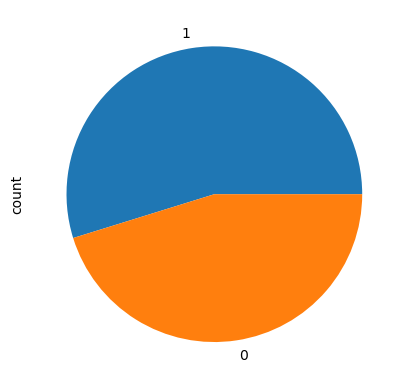

In [18]:
df['Rs'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

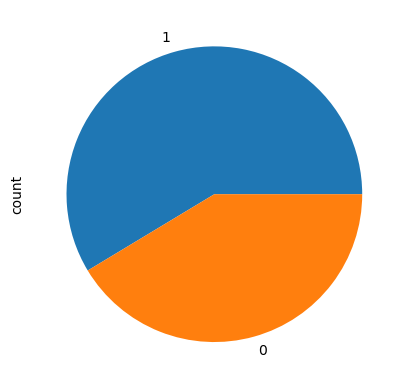

In [19]:
df['Hpr'].value_counts().plot(kind='pie')

In [20]:
features = list(df.columns)
features.remove('Rs')
features.remove('Hpr')

In [21]:
from wolta.data_tools import multi_split

X_train, X_test, y_trains, y_tests = multi_split(df, labels=['Rs', 'Hpr'], test_size=0.2, times=1000)

In [22]:
from collections import Counter

print(Counter(y_trains['Rs']))
print(Counter(y_tests['Rs']))

Counter({1: 11173, 0: 9118})
Counter({1: 2724, 0: 2349})


In [23]:
print(Counter(y_trains['Hpr']))
print(Counter(y_tests['Hpr']))

Counter({1: 11937, 0: 8354})
Counter({1: 2934, 0: 2139})


In [24]:
train = pd.DataFrame(X_train, columns=features)
test = pd.DataFrame(X_test, columns=features)

In [25]:
for feature in features:
    if feature not in rs_features:
        del train[feature]
        del test[feature]

In [26]:
X_train_rs = train.values
X_test_rs = test.values

In [27]:
X_train_rs.shape

(20291, 26)

In [28]:
train = pd.DataFrame(X_train, columns=features)
test = pd.DataFrame(X_test, columns=features)

In [29]:
for feature in features:
    if feature not in hpr_features:
        del train[feature]
        del test[feature]

In [30]:
X_train_hpr = train.values
X_test_hpr = test.values

In [31]:
X_train_hpr.shape

(20291, 20)

In [32]:
from wolta.model_tools import compare_models

results = compare_models('clf',
                       ['ada', 'cat', 'lbm', 'raf', 'dtr', 'ext', 'rdg', 'per'],
                       ['acc', 'precision', 'f1', 'recall'],
                       X_train, y_trains['Rs'], X_test, y_tests['Rs'],
                       get_result=True)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost
Accuracy Score: 0.8395426769170117
Precision Score: 0.8398897759370503
F1 Score (weighted): 0.8396409482934186
Recall Score: 0.8395426769170117
***
CatBoost
Accuracy Score: 0.941651882515277
Precision Score: 0.9417651126465194
F1 Score (weighted): 0.9416754574625436
Recall Score: 0.941651882515277
***
LightGBM
Accuracy Score: 0.9424403705893948
Precision Score: 0.9426969164095957
F1 Score (weighted): 0.942476865118474
Recall Score: 0.9424403705893948
***
Random Forest
Accuracy Score: 0.9217425586438005
Precision Score: 0.9217234438823507
F1 Score (weighted): 0.9217171158480322
Recall Score: 0.9217425586438005
***
Decision Tree
Accuracy Score: 0.9217425586438005
Precision Score: 0.9217449175897086
F1 Score (weighted): 0.9217437021392122
Recall Score: 0.9217425586438005
***
Extra Tree
Accuracy Score: 0.9181943623102701
Precision Score: 0.9182950010695962
F1 Score (weighted): 0.9182223092164781
Recall Score: 0.9181943623102701
***
Ridge
Accuracy Score: 0.782180169524936
Precision

In [33]:
from wolta.model_tools import get_best_model

model = get_best_model(results, 'acc', 'clf', X_train, y_trains['Rs'], behavior='max-best')
y_pred = model.predict(X_test)

Best Algorithm is lbm with the score of 0.9424403705893948


In [34]:
from sklearn.metrics import classification_report as rep

print(rep(y_tests['Rs'], y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2349
           1       0.95      0.94      0.95      2724

    accuracy                           0.94      5073
   macro avg       0.94      0.94      0.94      5073
weighted avg       0.94      0.94      0.94      5073



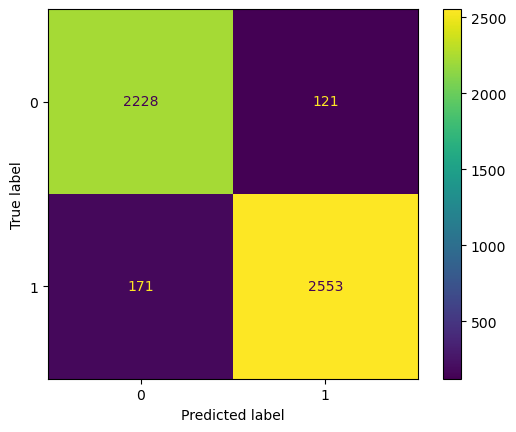

In [35]:
from sklearn.metrics import confusion_matrix as conf
from sklearn.metrics import ConfusionMatrixDisplay as cmd

cm = conf(y_tests['Rs'], y_pred)
disp = cmd(confusion_matrix=cm)
disp.plot()

In [36]:
from wolta.model_tools import compare_models

results = compare_models('clf',
                       ['ada', 'cat', 'lbm', 'raf', 'dtr', 'ext', 'rdg', 'per'],
                       ['acc', 'precision', 'f1', 'recall'],
                       X_train_rs, y_trains['Rs'], X_test_rs, y_tests['Rs'],
                       get_result=True)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost
Accuracy Score: 0.775478020894934
Precision Score: 0.7776823761122734
F1 Score (weighted): 0.7757800242129049
Recall Score: 0.775478020894934
***
CatBoost
Accuracy Score: 0.9146461659767396
Precision Score: 0.9151031626422681
F1 Score (weighted): 0.9147148605857846
Recall Score: 0.9146461659767396
***
LightGBM
Accuracy Score: 0.9093238714764439
Precision Score: 0.9097124406781495
F1 Score (weighted): 0.9093907216822745
Recall Score: 0.9093238714764439
***
Random Forest
Accuracy Score: 0.9181943623102701
Precision Score: 0.9181920303841796
F1 Score (weighted): 0.9181931605060872
Recall Score: 0.9181943623102701
***
Decision Tree
Accuracy Score: 0.9124778237729154
Precision Score: 0.9129948923118225
F1 Score (weighted): 0.912552282497637
Recall Score: 0.9124778237729154
***
Extra Tree
Accuracy Score: 0.9099152375320323
Precision Score: 0.9103345177802991
F1 Score (weighted): 0.9099843032597434
Recall Score: 0.9099152375320323
***
Ridge
Accuracy Score: 0.7074709245022669
Precisio

In [37]:
from wolta.model_tools import get_best_model

model = get_best_model(results, 'acc', 'clf', X_train_rs, y_trains['Rs'], behavior='max-best')
y_pred = model.predict(X_test_rs)

Best Algorithm is raf with the score of 0.9181943623102701


In [38]:
from sklearn.metrics import classification_report as rep

print(rep(y_tests['Rs'], y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      2349
           1       0.92      0.93      0.93      2724

    accuracy                           0.92      5073
   macro avg       0.92      0.92      0.92      5073
weighted avg       0.92      0.92      0.92      5073



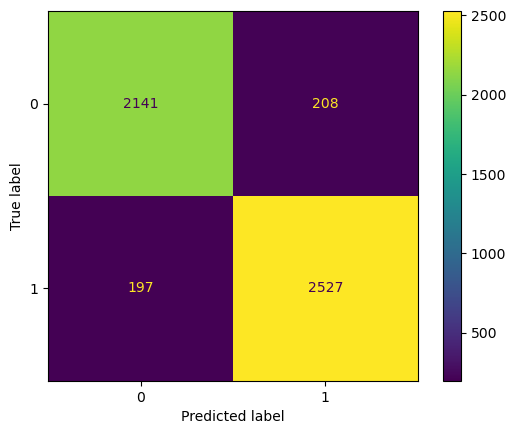

In [39]:
from sklearn.metrics import confusion_matrix as conf
from sklearn.metrics import ConfusionMatrixDisplay as cmd

cm = conf(y_tests['Rs'], y_pred)
disp = cmd(confusion_matrix=cm)
disp.plot()

In [40]:
from wolta.model_tools import compare_models

results = compare_models('clf',
                       ['ada', 'cat', 'lbm', 'raf', 'dtr', 'ext', 'rdg', 'per'],
                       ['acc', 'precision', 'f1', 'recall'],
                       X_train, y_trains['Hpr'], X_test, y_tests['Hpr'],
                       get_result=True)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost
Accuracy Score: 0.8298836980090676
Precision Score: 0.8296144078088934
F1 Score (weighted): 0.8297214597474829
Recall Score: 0.8298836980090676
***
CatBoost
Accuracy Score: 0.9402720283855707
Precision Score: 0.9414731047854658
F1 Score (weighted): 0.9399070809789843
Recall Score: 0.9402720283855707
***
LightGBM
Accuracy Score: 0.9410605164596886
Precision Score: 0.942159924918445
F1 Score (weighted): 0.9407163143609484
Recall Score: 0.9410605164596886
***
Random Forest
Accuracy Score: 0.9333727577370392
Precision Score: 0.9333244563730477
F1 Score (weighted): 0.9332697716194568
Recall Score: 0.9333727577370392
***
Decision Tree
Accuracy Score: 0.9278533412182141
Precision Score: 0.927943728780684
F1 Score (weighted): 0.9278891267360319
Recall Score: 0.9278533412182141
***
Extra Tree
Accuracy Score: 0.9211511925882121
Precision Score: 0.9212077739792197
F1 Score (weighted): 0.9211758337194477
Recall Score: 0.9211511925882121
***
Ridge
Accuracy Score: 0.7650305539128721
Precisi

In [41]:
from wolta.model_tools import get_best_model

model = get_best_model(results, 'acc', 'clf', X_train, y_trains['Hpr'], behavior='max-best')
y_pred = model.predict(X_test)

Best Algorithm is lbm with the score of 0.9410605164596886


In [42]:
from sklearn.metrics import classification_report as rep

print(rep(y_tests['Hpr'], y_pred))

              precision    recall  f1-score   support

           0       0.96      0.89      0.93      2139
           1       0.93      0.98      0.95      2934

    accuracy                           0.94      5073
   macro avg       0.95      0.93      0.94      5073
weighted avg       0.94      0.94      0.94      5073



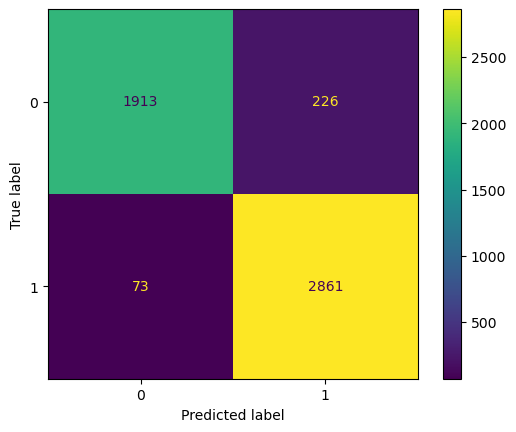

In [43]:
from sklearn.metrics import confusion_matrix as conf
from sklearn.metrics import ConfusionMatrixDisplay as cmd

cm = conf(y_tests['Hpr'], y_pred)
disp = cmd(confusion_matrix=cm)
disp.plot()

In [44]:
from wolta.model_tools import compare_models

results = compare_models('clf',
                       ['ada', 'cat', 'lbm', 'raf', 'dtr', 'ext', 'rdg', 'per'],
                       ['acc', 'precision', 'f1', 'recall'],
                       X_train_hpr, y_trains['Hpr'], X_test_hpr, y_tests['Hpr'],
                       get_result=True)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost
Accuracy Score: 0.7459097181155135
Precision Score: 0.7512338099004657
F1 Score (weighted): 0.7368577100967744
Recall Score: 0.7459097181155135
***
CatBoost
Accuracy Score: 0.8600433668440765
Precision Score: 0.8638984024143284
F1 Score (weighted): 0.8578341372872803
Recall Score: 0.8600433668440765
***
LightGBM
Accuracy Score: 0.8529469741770156
Precision Score: 0.8601060959994873
F1 Score (weighted): 0.8497091459884345
Recall Score: 0.8529469741770156
***
Random Forest
Accuracy Score: 0.8848807411787897
Precision Score: 0.8882076838790763
F1 Score (weighted): 0.8833793904081416
Recall Score: 0.8848807411787897
***
Decision Tree
Accuracy Score: 0.882909520993495
Precision Score: 0.8857527730199919
F1 Score (weighted): 0.8814756455415792
Recall Score: 0.882909520993495
***
Extra Tree
Accuracy Score: 0.8813325448452592
Precision Score: 0.8836880821063136
F1 Score (weighted): 0.8799846624482305
Recall Score: 0.8813325448452592
***
Ridge
Accuracy Score: 0.6865759905381431
Precisi

In [45]:
from wolta.model_tools import get_best_model

model = get_best_model(results, 'acc', 'clf', X_train_hpr, y_trains['Hpr'], behavior='max-best')
y_pred = model.predict(X_test_hpr)

Best Algorithm is raf with the score of 0.8848807411787897


In [46]:
from sklearn.metrics import classification_report as rep

print(rep(y_tests['Hpr'], y_pred))

              precision    recall  f1-score   support

           0       0.92      0.80      0.85      2139
           1       0.87      0.95      0.91      2934

    accuracy                           0.89      5073
   macro avg       0.89      0.87      0.88      5073
weighted avg       0.89      0.89      0.88      5073



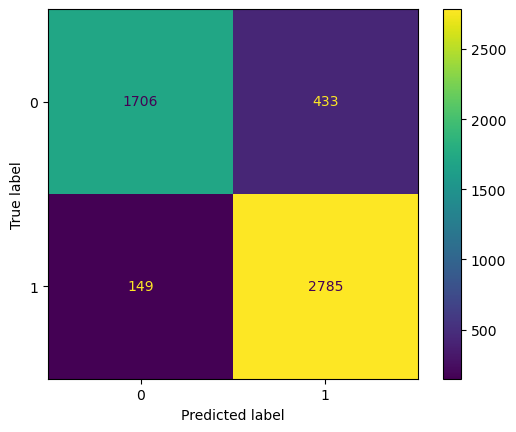

In [47]:
from sklearn.metrics import confusion_matrix as conf
from sklearn.metrics import ConfusionMatrixDisplay as cmd

cm = conf(y_tests['Hpr'], y_pred)
disp = cmd(confusion_matrix=cm)
disp.plot()